In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model

In [2]:
df_degrees = pd.read_csv('degrees-that-pay-back.csv')
df_degrees.head()
df_degrees_copy = df_degrees.copy()

In [3]:
df_college_salaries = pd.read_csv('salaries-by-college-type.csv')
df_college_salaries.head()
df_college_salaries_copy = df_college_salaries.copy()

In [4]:
df_region_salaries = pd.read_csv('salaries-by-region.csv')
df_region_salaries.head()
df_region_salaries_copy = df_region_salaries.copy()

In [5]:
df_degrees.describe()

,Percent change from Starting to Mid-Career Salary
count,50.000000
mean,69.274000
std,17.909908
min,23.400000
25%,59.125000
50%,67.800000
75%,82.425000
max,103.500000


In [6]:
df_degrees.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary',
       'Percent change from Starting to Mid-Career Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [7]:
#unique values from 'Undergraduate Major' column
df_degrees['Undergraduate Major'].unique()

array(['Accounting', 'Aerospace Engineering', 'Agriculture',
       'Anthropology', 'Architecture', 'Art History', 'Biology',
       'Business Management', 'Chemical Engineering', 'Chemistry',
       'Civil Engineering', 'Communications', 'Computer Engineering',
       'Computer Science', 'Construction', 'Criminal Justice', 'Drama',
       'Economics', 'Education', 'Electrical Engineering', 'English',
       'Film', 'Finance', 'Forestry', 'Geography', 'Geology',
       'Graphic Design', 'Health Care Administration', 'History',
       'Hospitality & Tourism', 'Industrial Engineering',
       'Information Technology (IT)', 'Interior Design',
       'International Relations', 'Journalism',
       'Management Information Systems (MIS)', 'Marketing', 'Math',
       'Mechanical Engineering', 'Music', 'Nursing', 'Nutrition',
       'Philosophy', 'Physician Assistant', 'Physics',
       'Political Science', 'Psychology', 'Religion', 'Sociology',
       'Spanish'], dtype=object)

In [8]:
#sort the dataframe by starting median salary ascending
df_degrees.sort_values(by=['Starting Median Salary'], inplace=True)

In [9]:
# convert 'Starting Median Salary' values from string to float
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace('$','').str.replace(',','').astype(float)
# convert 'Starting Median Salary' values from float to integer
df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\4256191334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_degrees['Starting Median Salary'] = df_degrees['Starting Median Salary'].str.replace('$','').str.replace(',','').astype(float)


In [10]:
#show converted values
df_degrees['Starting Median Salary'].head()

49    34000
47    34100
18    34900
15    35000
34    35600
Name: Starting Median Salary, dtype: int32

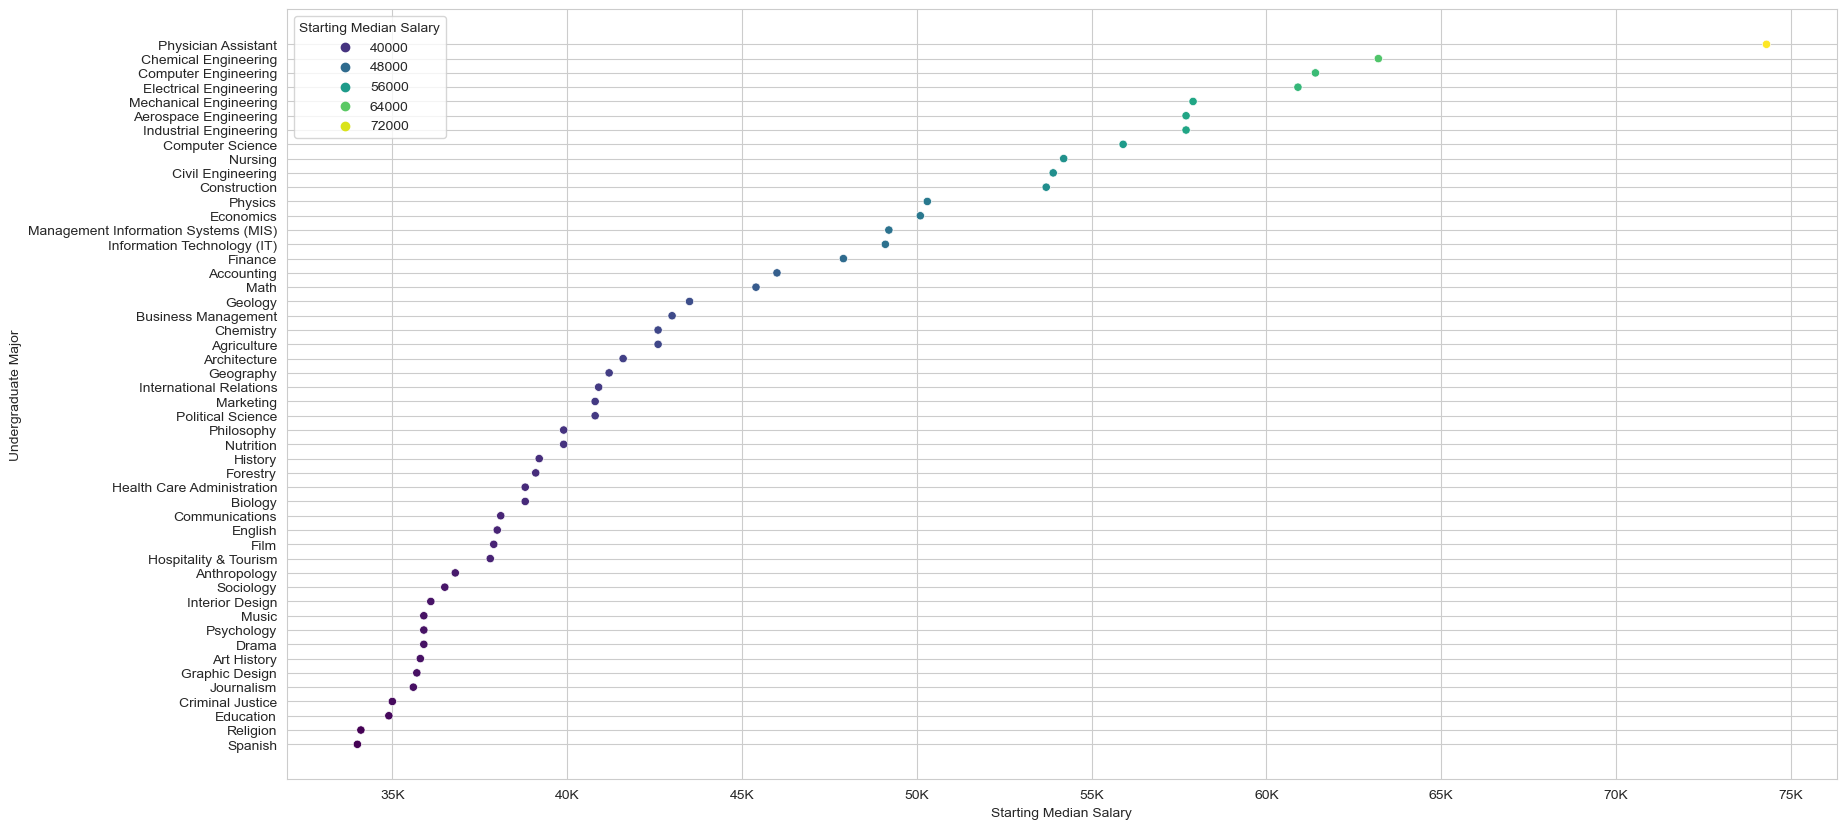

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

def format_x_axis_labels(x, pos):
    return '{:.0f}K'.format(x/1000)

# Sort the DataFrame by "Starting Median Salary" in ascending order
df_degrees_sorted = df_degrees.sort_values(by="Starting Median Salary")

# Create the scatterplot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Starting Median Salary", y="Undergraduate Major", data=df_degrees_sorted, hue="Starting Median Salary", palette="viridis", ax=ax)

# Set the X axis label format to show values in overall thousands
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis_labels))

# Invert the y-axis to have lowest paying major at the bottom
ax.invert_yaxis()

# Show the plot
plt.show()

In [12]:
#show unique values from the df_region_salaries dataframe, from region column
df_region_salaries["Region"].unique()

array(['California', 'Western', 'Midwestern', 'Southern', 'Northeastern'],
      dtype=object)

In [13]:
# Filter the rows where 'Region' is 'California'
california_salaries = df_region_salaries[df_region_salaries['Region'] == 'California']

# Create a new DataFrame from the filtered results
df_california_salaries = california_salaries.copy()

df_california_salaries.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [14]:
# Filter the rows for different regions and create new DataFrames
western_salaries = df_region_salaries[df_region_salaries['Region'] == 'Western']
midwestern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Midwestern']
southern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Southern']
northeastern_salaries = df_region_salaries[df_region_salaries['Region'] == 'Northeastern']

# Create new DataFrames for each region
df_western_salaries = western_salaries.copy()
df_midwestern_salaries = midwestern_salaries.copy()
df_southern_salaries = southern_salaries.copy()
df_northeastern_salaries = northeastern_salaries.copy()

In [15]:
# Count NaN rows in 'Starting Median Salary' column for each region DataFrame
null_count_western = df_western_salaries['Starting Median Salary'].isna().sum()
null_count_midwestern = df_midwestern_salaries['Starting Median Salary'].isna().sum()
null_count_southern = df_southern_salaries['Starting Median Salary'].isna().sum()
null_count_northeastern = df_northeastern_salaries['Starting Median Salary'].isna().sum()
null_count_california = df_california_salaries['Starting Median Salary'].isna().sum()

print("Number of NaN rows in 'Starting Median Salary' column for Western Region:", null_count_western)
print("Number of NaN rows in 'Starting Median Salary' column for Midwestern Region:", null_count_midwestern)
print("Number of NaN rows in 'Starting Median Salary' column for Southern Region:", null_count_southern)
print("Number of NaN rows in 'Starting Median Salary' column for Northeastern Region:", null_count_northeastern)
print("Number of NaN rows in 'Starting Median Salary' column for California:", null_count_california)

Number of NaN rows in 'Starting Median Salary' column for Western Region: 0
Number of NaN rows in 'Starting Median Salary' column for Midwestern Region: 0
Number of NaN rows in 'Starting Median Salary' column for Southern Region: 0
Number of NaN rows in 'Starting Median Salary' column for Northeastern Region: 0
Number of NaN rows in 'Starting Median Salary' column for California: 0


In [16]:
# Data preprocessing steps
def preprocess_dataframe(df):
    df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
    df['Starting Median Salary'] = df['Starting Median Salary'].astype(int)
    return df

df_western_salaries = preprocess_dataframe(western_salaries.copy())
df_midwestern_salaries = preprocess_dataframe(midwestern_salaries.copy())
df_southern_salaries = preprocess_dataframe(southern_salaries.copy())
df_northeastern_salaries = preprocess_dataframe(northeastern_salaries.copy())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\367346242.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [17]:
# Data preprocessing steps
def preprocess_dataframe2(df):
    df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
    df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].astype(int)
    return df

df_western_salaries = preprocess_dataframe2(western_salaries.copy())
df_midwestern_salaries = preprocess_dataframe2(midwestern_salaries.copy())
df_southern_salaries = preprocess_dataframe2(southern_salaries.copy())
df_northeastern_salaries = preprocess_dataframe2(northeastern_salaries.copy())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\3566682875.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


In [18]:
#df_region_salaries_copy to be changed, df_degrees_copy to be changed
df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].astype(int)

df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].astype(int)

df_region_salaries_copy['Starting Median Salary'] = df_region_salaries_copy['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_region_salaries_copy['Starting Median Salary'] = df_region_salaries_copy['Starting Median Salary'].astype(int)

df_degrees_copy['Starting Median Salary'] = df_degrees_copy['Starting Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
df_degrees_copy['Starting Median Salary'] = df_degrees_copy['Starting Median Salary'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\2728166675.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_region_salaries_copy['Mid-Career Median Salary'] = df_region_salaries_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\2728166675.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_degrees_copy['Mid-Career Median Salary'] = df_degrees_copy['Mid-Career Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\2728166675.py:8: FutureWarning: The default value of regex will change from True 

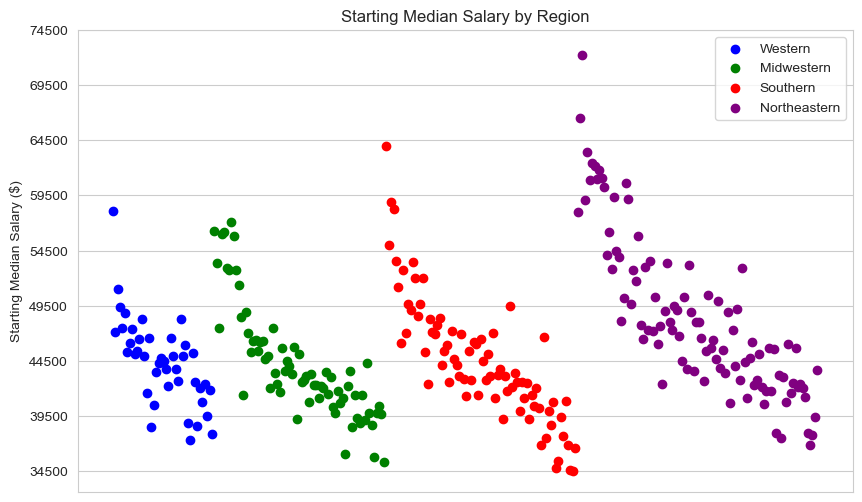

In [19]:
region_colors = {
    'Western': 'blue',
    'Midwestern': 'green',
    'Southern': 'red',
    'Northeastern': 'purple'
}

# Create the scatterplot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    region_data = df_region_salaries_copy[df_region_salaries_copy['Region'] == region]
    plt.scatter(region_data.index, region_data['Starting Median Salary'], label=region, color=color)

plt.ylabel('Starting Median Salary ($)')
plt.title('Starting Median Salary by Region')
plt.legend()

# Customize y-axis ticks
min_salary = df_region_salaries_copy['Starting Median Salary'].min()
max_salary = df_region_salaries_copy['Starting Median Salary'].max()
plt.yticks(range(min_salary, max_salary + 1, 5000))

# Remove x-axis ticks and labels
plt.xticks([])

plt.grid(True)
plt.show()

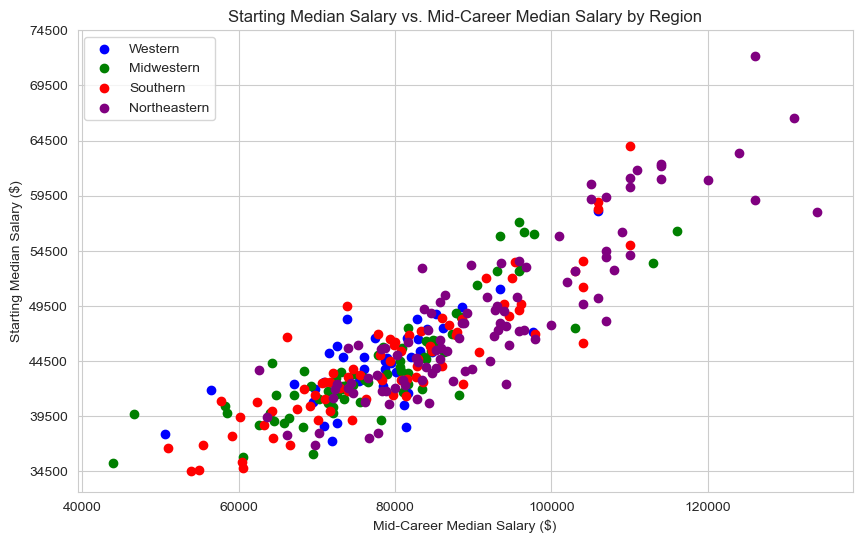

In [20]:
region_colors = {
    'Western': 'blue',
    'Midwestern': 'green',
    'Southern': 'red',
    'Northeastern': 'purple'
}

# Create the scatterplot
plt.figure(figsize=(10, 6))
for region, color in region_colors.items():
    region_data = df_region_salaries_copy[df_region_salaries_copy['Region'] == region]
    plt.scatter(region_data['Mid-Career Median Salary'], region_data['Starting Median Salary'], label=region, color=color)

plt.xlabel('Mid-Career Median Salary ($)')
plt.ylabel('Starting Median Salary ($)')
plt.title('Starting Median Salary vs. Mid-Career Median Salary by Region')
plt.legend()

# Customize y-axis ticks
min_salary = df_region_salaries_copy['Starting Median Salary'].min()
max_salary = df_region_salaries_copy['Starting Median Salary'].max()
plt.yticks(range(min_salary, max_salary + 1, 5000))

plt.grid(True)
plt.show()

In [21]:
df_region_salaries_model = df_region_salaries_copy.copy()

In [22]:
#drop nan values from the dataset
df_region_salaries_model.dropna(inplace=True)

#drop schoolname column
df_region_salaries_model.drop(columns=['School Name'], inplace=True)

In [23]:
# Preprocess other columns similarly
percentile_columns = ["Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", 
                     "Mid-Career 90th Percentile Salary", "Mid-Career 75th Percentile Salary"]

for column in percentile_columns:
    df_region_salaries_model[column] = df_region_salaries_model[column].str.replace('$', '').str.replace(',', '').astype(float)
    df_region_salaries_model[column] = df_region_salaries_model[column].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7588\2965421022.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_region_salaries_model[column] = df_region_salaries_model[column].str.replace('$', '').str.replace(',', '').astype(float)


In [24]:
#encode region column with numerical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_region_salaries_model['Region'] = le.fit_transform(df_region_salaries_model['Region'])


df_region_salaries_model.columns

Index(['Region', 'Starting Median Salary', 'Mid-Career Median Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [25]:
#set X and y values for model
X = df_region_salaries_model.drop(columns=['Starting Median Salary'])
y = df_region_salaries_model['Starting Median Salary']

#split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(218, 6)
(55, 6)
(218,)
(55,)


In [27]:
df_region_salaries_model.columns

Index(['Region', 'Starting Median Salary', 'Mid-Career Median Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [28]:
df_region_salaries_model.describe()

,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2.113553,46365.201465,83747.619048,45253.113553,60834.798535,115269.230769,160442.124542
std,1.143202,6311.007952,14527.134974,8562.834333,11054.626961,22753.164093,36785.768186
min,0.000000,34800.000000,46600.000000,25600.000000,36800.000000,65600.000000,85700.000000
25%,1.000000,42200.000000,73500.000000,39500.000000,53400.000000,99900.000000,136000.000000
50%,2.000000,45300.000000,82400.000000,43700.000000,59400.000000,112000.000000,154000.000000
75%,3.000000,48900.000000,91600.000000,48900.000000,65400.000000,124000.000000,178000.000000
max,4.000000,72200.000000,134000.000000,80000.000000,100000.000000,234000.000000,326000.000000


In [29]:
df_region_salaries_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 319
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Region                             273 non-null    int32
 1   Starting Median Salary             273 non-null    int32
 2   Mid-Career Median Salary           273 non-null    int32
 3   Mid-Career 10th Percentile Salary  273 non-null    int32
 4   Mid-Career 25th Percentile Salary  273 non-null    int32
 5   Mid-Career 75th Percentile Salary  273 non-null    int32
 6   Mid-Career 90th Percentile Salary  273 non-null    int32
dtypes: int32(7)
memory usage: 9.6 KB


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [31]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 7916862.039160676
Mean Absolute Error (MAE): 2098.8513087054253
R-squared Score: 0.7325445380911464

Results for Decision Tree:
Mean Squared Error (MSE): 11750000.0
Mean Absolute Error (MAE): 2605.4545454545455
R-squared Score: 0.6030495843069914

Results for Random Forest:
Mean Squared Error (MSE): 7022146.636363637
Mean Absolute Error (MAE): 2091.0
R-squared Score: 0.7627707211606973

Results for SVR:
Mean Squared Error (MSE): 29528955.560527
Mean Absolute Error (MAE): 4039.826311158817
R-squared Score: 0.0024228778951856933

Results for XGBoost:
Mean Squared Error (MSE): 7740864.758534934
Mean Absolute Error (MAE): 2268.995880681818
R-squared Score: 0.7384902567043572

Results for LightGBM:
Mean Squared Error (MSE): 7348831.770825222
Mean Absolute Error (MAE): 2080.6289485434645
R-squared Score: 0.7517343126564204

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 7781259.886503304
Mean Absolute Error (MAE): 2

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.032185
0:	learn: 6328.2406643	total: 197ms	remaining: 3m 17s
1:	learn: 6190.9485032	total: 199ms	remaining: 1m 39s
2:	learn: 6053.9126897	total: 199ms	remaining: 1m 6s
3:	learn: 5921.9613426	total: 200ms	remaining: 49.9s
4:	learn: 5811.0005876	total: 201ms	remaining: 40s
5:	learn: 5684.4413162	total: 202ms	remaining: 33.5s
6:	learn: 5569.4460174	total: 203ms	remaining: 28.8s
7:	learn: 5454.4901078	total: 204ms	remaining: 25.3s
8:	learn: 5354.1064140	total: 205ms	remaining: 22.5s
9:	learn: 5242.2055929	total: 205ms	remaining: 20.3s
10:	learn: 5149.8724841	total: 206ms	remaining: 18.6s
11:	learn: 5049.3449148	total: 207ms	remaining: 17.1s
12:	learn: 4954.8362874	total: 208ms	remaining: 15.8s
13:	learn: 4857.9630268	total: 209ms	remaining: 14.7s
14:	learn: 4779.3084768	total: 210ms	remaining: 13.8s
15:	learn: 4698.5669398	total: 211ms	remaining: 13s
16:	learn: 4624.2063601	total: 212ms	remaining: 12.2s
17:	learn: 4548.2857496	total: 213ms	remaining: 11.6s
18:	learn:

In [32]:
accuracy

[0.7325445380911464,
 0.6030495843069914,
 0.7627707211606973,
 0.0024228778951856933,
 0.7384902567043572,
 0.7517343126564204,
 0.7371255875265685,
 0.7390881695773706,
 0.7473146021689924,
 0.031435516977943334,
 0.7481697734164201]

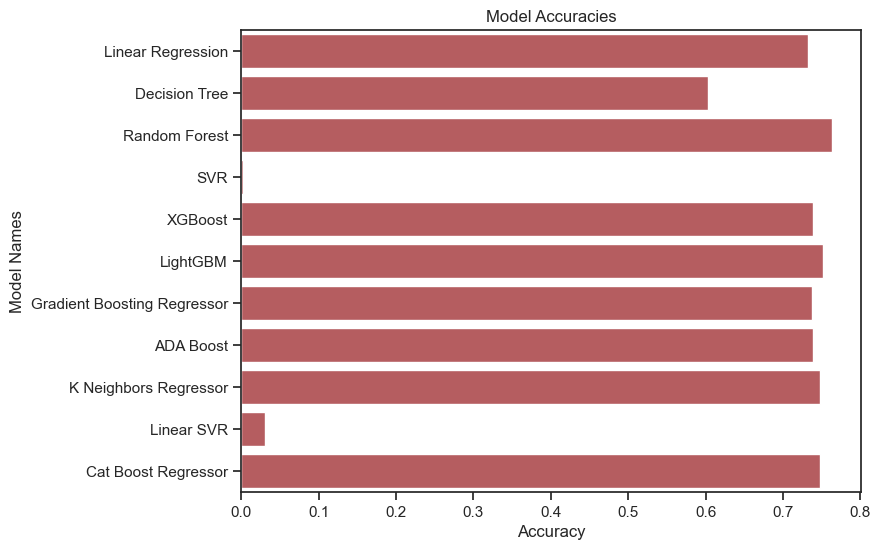

In [33]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in classification is: 1 with an accuracy of 0.0182


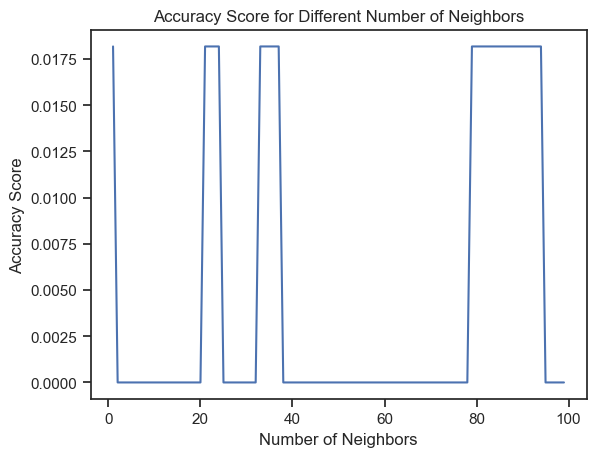

In [34]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in classification is: {best_k} with an accuracy of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


The best value for k neighbors in regression is: 6 with an R-squared score of 0.7721


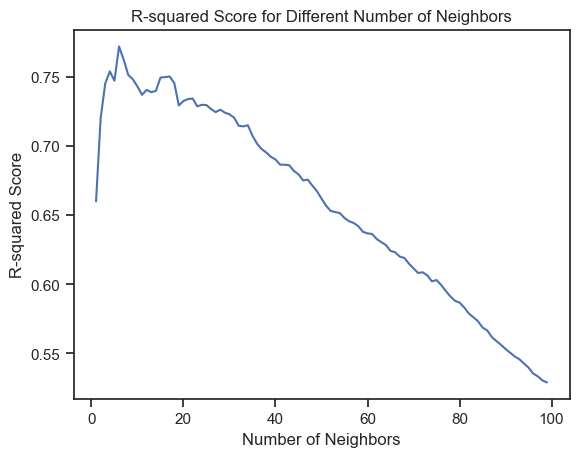

In [35]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()